<a href="https://colab.research.google.com/github/angiecoronel12/Proyecto_AI_Accidents/blob/main/02_Accident_Severity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENTREGA 2 DEL PROYECTO IA

PREDICCIÓN DE LA SEVERIDAD DE UN ACCIDENTE DE TRÁNSITO EN FUNCIÓN DEL TIPO DE VEHÍCULO

Presentado por: 

LIZETH GIRALDO VELEZ
CC:1001237603

ANGIE LISETH CORONEL YELA 
CC: 1085333292


## 1. EXPLORACIÓN DE LOS DATOS 

### 1.1 Carga de los datos desde Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lizethgiraldovelez","key":"950c81f4cc33cb3fb9911cb27c2a5134"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d benoit72/uk-accidents-10-years-history-with-many-variables

 94% 97.0M/103M [00:00<00:00, 144MB/s]
100% 103M/103M [00:00<00:00, 137MB/s] 


In [ ]:
!unzip uk-accidents-10-years-history-with-many-variables;

Archive:  uk-accidents-10-years-history-with-many-variables.zip
  inflating: Accidents0514.csv       
  inflating: Casualties0514.csv      
  inflating: Road-Accident-Safety-Data-Guide.xls  
  inflating: Vehicles0514.csv        


In [ ]:
# Se importan las librerias necesarias para este trabajo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
from sklearn.model_selection import learning_curve

### 1.2 Lectura y primer análisis de los Dataset

In [ ]:
#Cargar los datos
df_accidents = pd.read_csv("Accidents0514.csv")
df_accidents = df_accidents.copy()

df_vehicles = pd.read_csv("Vehicles0514.csv")
df_vehicles = df_vehicles.copy()

df_victims = pd.read_csv("Casualties0514.csv")
df_victims = df_victims.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_accidents

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,0,0,6,2,2,0,0,2,1,NaN


In [ ]:
df_vehicles

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004420,2014984138414,1,9,0,5,0,6,0,0,0,...,1,2,1,27,6,1781,1,12,6,1
3004421,2014984138414,2,19,0,18,0,1,1,4,7,...,1,2,1,44,7,1686,2,4,1,1
3004422,2014984138414,3,9,0,18,0,2,1,4,1,...,1,6,1,73,10,2143,2,-1,8,3
3004423,2014984139614,1,11,0,9,0,8,0,0,0,...,1,1,1,40,7,4500,2,4,-1,3


In [ ]:
df_victims

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216715,2014984137714,1,1,2,2,16,4,3,0,0,2,0,0,9,1
2216716,2014984138414,1,1,1,1,27,6,3,0,0,0,0,0,9,1
2216717,2014984138414,2,2,1,1,44,7,2,0,0,0,0,0,19,1
2216718,2014984139614,1,2,2,1,61,9,3,0,0,0,4,0,11,2


### 1.3 Datos faltantes en cada uno de los datasets

Los datos faltantes en el dataset de estudio se encuentran reportados con un "-1"


In [ ]:
#Se muestran los datos faltantes del Dataset de accidents
for i in df_accidents.columns:

  Nan_accidents = str((df_accidents[i]==-1).sum())
  print(i + ': ' + Nan_accidents)

Accident_Index: 0
Location_Easting_OSGR: 0
Location_Northing_OSGR: 0
Longitude: 1
Latitude: 0
Police_Force: 0
Accident_Severity: 0
Number_of_Vehicles: 0
Number_of_Casualties: 0
Date: 0
Day_of_Week: 0
Time: 0
Local_Authority_(District): 0
Local_Authority_(Highway): 0
1st_Road_Class: 0
1st_Road_Number: 2
Road_Type: 0
Speed_limit: 0
Junction_Detail: 18
Junction_Control: 585322
2nd_Road_Class: 676268
2nd_Road_Number: 16118
Pedestrian_Crossing-Human_Control: 21
Pedestrian_Crossing-Physical_Facilities: 37
Light_Conditions: 0
Weather_Conditions: 161
Road_Surface_Conditions: 2155
Special_Conditions_at_Site: 18
Carriageway_Hazards: 32
Urban_or_Rural_Area: 0
Did_Police_Officer_Attend_Scene_of_Accident: 270
LSOA_of_Accident_Location: 0


In [ ]:
#Se muestran los datos faltantes del Dataset de vehicles
for j in df_vehicles.columns:

  Nan_vehicles = str((df_vehicles[j]==-1).sum())
  print(j + ': ' + Nan_vehicles)

Accident_Index: 0
Vehicle_Reference: 0
Vehicle_Type: 473
Towing_and_Articulation: 184
Vehicle_Manoeuvre: 1080
Vehicle_Location-Restricted_Lane: 74
Junction_Location: 9876
Skidding_and_Overturning: 132
Hit_Object_in_Carriageway: 87
Vehicle_Leaving_Carriageway: 127
Hit_Object_off_Carriageway: 54
1st_Point_of_Impact: 565
Was_Vehicle_Left_Hand_Drive?: 23049
Journey_Purpose_of_Driver: 44921
Sex_of_Driver: 33
Age_of_Driver: 330608
Age_Band_of_Driver: 330608
Engine_Capacity_(CC): 788471
Propulsion_Code: 770004
Age_of_Vehicle: 874989
Driver_IMD_Decile: 849921
Driver_Home_Area_Type: 588611


In [ ]:
#Se muestran los datos faltantes del Dataset de victims
for k in df_victims.columns:

  Nan_victims = str((df_victims[k]==-1).sum())
  print(k + ': ' + Nan_victims)

Accident_Index: 0
Vehicle_Reference: 0
Casualty_Reference: 0
Casualty_Class: 0
Sex_of_Casualty: 630
Age_of_Casualty: 45920
Age_Band_of_Casualty: 45920
Casualty_Severity: 0
Pedestrian_Location: 12
Pedestrian_Movement: 15
Car_Passenger: 404
Bus_or_Coach_Passenger: 38
Pedestrian_Road_Maintenance_Worker: 1439022
Casualty_Type: 0
Casualty_Home_Area_Type: 322715


## 2. PREPROCESAMIENTO DE LOS DATOS 

### 2.1 Identificación de las variables y sustitución de los datos

In [ ]:
#Se reemplazan los -1 por Nan

df_accidents.replace(-1,np.nan,inplace=True) 
df_vehicles.replace(-1,np.nan,inplace=True) 
df_victims.replace(-1,np.nan,inplace=True) 

### 2.2 Variables numéricas

**Variables numérica, se reemplazan los valores faltantes por el promedio .mean()**

In [ ]:
num_variables_accidents = ["Longitude", "1st_Road_Number", "Junction_Detail", "2nd_Road_Number"]
for i in num_variables_accidents:
  df_accidents[i] = df_accidents[i].fillna(df_accidents[i].mean()) 

In [ ]:
num_variables_accidents

['Longitude', '1st_Road_Number', 'Junction_Detail', '2nd_Road_Number']

In [ ]:
num_variables_victims = ["Age_of_Casualty", "Age_Band_of_Casualty"]
for i in num_variables_victims:
  df_victims[i] = df_victims[i].fillna(df_victims[i].mean())

In [ ]:
num_variables_victims

['Age_of_Casualty', 'Age_Band_of_Casualty']

### 2.3 Variables categóricas

**Variables categóricas, se reemplazan los valores faltantes por la moda .mode()**

In [ ]:
df_vehicles["Vehicle_Type"].value_counts() #Ver cantidad de datos de cada valor

9.0     2205201
1.0      184083
19.0     138182
5.0       86904
11.0      76888
3.0       70152
21.0      62962
8.0       52409
2.0       37224
4.0       25686
90.0      24305
20.0      22567
10.0       8387
17.0       6304
16.0       1297
22.0        459
98.0        387
97.0        286
18.0        250
23.0         19
Name: Vehicle_Type, dtype: int64

In [ ]:
cat_variables_accidents = ["Junction_Control", "2nd_Road_Class", "Pedestrian_Crossing-Human_Control", "Pedestrian_Crossing-Physical_Facilities","Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Carriageway_Hazards", "Did_Police_Officer_Attend_Scene_of_Accident"]
for i in cat_variables_accidents:
  print(f" Mode : {df_accidents[i].mode()}")
  df_accidents[i] = df_accidents[i].fillna(df_accidents[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

 Mode : 0    4.0
dtype: float64
 Mode : 0    6.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64


In [ ]:
cat_variables_vehicles = ["Vehicle_Type", "Towing_and_Articulation", "Vehicle_Manoeuvre", "Vehicle_Location-Restricted_Lane", "Junction_Location", "Skidding_and_Overturning", "Hit_Object_in_Carriageway", "Vehicle_Leaving_Carriageway", "Hit_Object_off_Carriageway" , "1st_Point_of_Impact", "Was_Vehicle_Left_Hand_Drive?", "Journey_Purpose_of_Driver", "Sex_of_Driver", "Age_of_Driver", "Age_Band_of_Driver", "Engine_Capacity_(CC)", "Propulsion_Code", "Age_of_Vehicle", "Driver_IMD_Decile", "Driver_Home_Area_Type"]
for i in cat_variables_vehicles:
  print(f" Mode : {df_vehicles[i].mode()}")
  df_vehicles[i] = df_vehicles[i].fillna(df_vehicles[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

 Mode : 0    9.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    18.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    15.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    30.0
dtype: float64
 Mode : 0    6.0
dtype: float64
 Mode : 0    1598.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    1.0
dtype: float64
 Mode : 0    3.0
dtype: float64
 Mode : 0    1.0
dtype: float64


In [ ]:
cat_variables_victims = ["Sex_of_Casualty", "Pedestrian_Location", "Pedestrian_Movement", "Car_Passenger", "Bus_or_Coach_Passenger", "Pedestrian_Road_Maintenance_Worker", "Casualty_Home_Area_Type"]
for i in cat_variables_victims:
  print(f" Mode : {df_victims[i].mode()}")
  df_victims[i] = df_victims[i].fillna(df_victims[i].mode().iloc[0]) #En caso de que la moda sean dos categorias se elije la primera

 Mode : 0    1.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    0.0
dtype: float64
 Mode : 0    1.0
dtype: float64


In [ ]:
cat_variables_victims, cat_variables_vehicles, cat_variables_accidents

(['Sex_of_Casualty',
  'Pedestrian_Location',
  'Pedestrian_Movement',
  'Car_Passenger',
  'Bus_or_Coach_Passenger',
  'Pedestrian_Road_Maintenance_Worker',
  'Casualty_Home_Area_Type'],
 ['Vehicle_Type',
  'Towing_and_Articulation',
  'Vehicle_Manoeuvre',
  'Vehicle_Location-Restricted_Lane',
  'Junction_Location',
  'Skidding_and_Overturning',
  'Hit_Object_in_Carriageway',
  'Vehicle_Leaving_Carriageway',
  'Hit_Object_off_Carriageway',
  '1st_Point_of_Impact',
  'Was_Vehicle_Left_Hand_Drive?',
  'Journey_Purpose_of_Driver',
  'Sex_of_Driver',
  'Age_of_Driver',
  'Age_Band_of_Driver',
  'Engine_Capacity_(CC)',
  'Propulsion_Code',
  'Age_of_Vehicle',
  'Driver_IMD_Decile',
  'Driver_Home_Area_Type'],
 ['Junction_Control',
  '2nd_Road_Class',
  'Pedestrian_Crossing-Human_Control',
  'Pedestrian_Crossing-Physical_Facilities',
  'Weather_Conditions',
  'Road_Surface_Conditions',
  'Special_Conditions_at_Site',
  'Carriageway_Hazards',
  'Did_Police_Officer_Attend_Scene_of_Accident'])

## 3. MODELOS E ITERACIONES

### 3.1 Análisis de la variable objetivo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


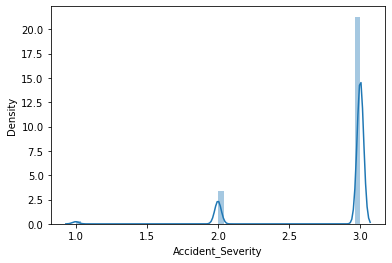

In [ ]:
sns.distplot(df_accidents['Accident_Severity'])

### 3.2 Generación tabla de variables finales de entrada y salida del modelo

In [ ]:
# df_victims[df_victims["Accident_Index"] == "20144100J0489"]
df_vehicles_cleaned = df_vehicles.groupby("Accident_Index").first().reset_index()
df_victims_cleaned = df_victims.groupby("Accident_Index").first().reset_index()

In [ ]:
print(df_accidents.shape)
print(df_victims_cleaned.shape)
print(df_vehicles_cleaned.shape)
# "Accident_Index"

(1640597, 32)
(1640597, 15)
(1640597, 22)


Unimos el dataset con la primary key "Accident_Index" y posteriormente se eliminan las variables que no son de interés 

In [ ]:
df_model_variables = df_accidents.merge(df_victims_cleaned,how="inner",on="Accident_Index").merge(df_vehicles_cleaned,how="inner",on="Accident_Index")

In [ ]:
df_model_variables.drop(['Accident_Index','Did_Police_Officer_Attend_Scene_of_Accident','Sex_of_Casualty',
                         'Sex_of_Driver','1st_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Physical_Facilities',
                           'Casualty_Type','Pedestrian_Crossing-Human_Control','1st_Road_Number','Junction_Control',
                         'Bus_or_Coach_Passenger','Day_of_Week','Longitude','Was_Vehicle_Left_Hand_Drive?','Location_Easting_OSGR',
                         'Propulsion_Code','Vehicle_Location-Restricted_Lane','Journey_Purpose_of_Driver','Car_Passenger','Driver_IMD_Decile',
                         'Age_Band_of_Casualty','Age_Band_of_Driver','Latitude','Location_Northing_OSGR','Age_of_Driver','Age_of_Casualty',
                         'Local_Authority_(District)','Police_Force','Pedestrian_Movement','Casualty_Home_Area_Type','Pedestrian_Location',
                         'Casualty_Class','Driver_Home_Area_Type','2nd_Road_Class','Number_of_Vehicles','Light_Conditions',
                         'Vehicle_Leaving_Carriageway','Casualty_Reference','Number_of_Casualties','Pedestrian_Road_Maintenance_Worker',
                         'Local_Authority_(Highway)','Date','Time','LSOA_of_Accident_Location'],axis = 1,inplace=True)


### 3.3 División del dataset en Train & Test

Se divide el dataset con un 30% de los datos para validacion y 70% para entrenamiento

In [ ]:
y = df_model_variables['Accident_Severity'].values
X = df_model_variables.drop('Accident_Severity',axis=1)

test_size = 0.3
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=test_size,random_state=1)
print(X_train.shape, X_test.shape)

(1148417, 21) (492180, 21)


### 3.4 Aplicacion de los Metodos Supervisados

In [ ]:
#Función para calcular el RMSLE de los modelos implementados
def RMSLE(y_actual, y_pred):
    
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [ ]:
estimator1 = LinearRegression()
estimator2 = DecisionTreeRegressor(max_depth=5)
estimator3 = RandomForestRegressor(n_estimators = 2,max_depth = 5)

In [ ]:
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [ ]:
test_size = 0.3
val_size  = test_size/(1-test_size)
zscores = []
estimators = [estimator1, estimator2, estimator3]
for estimator in estimators:
    print("---------")
    z = cross_validate(estimator, X_train, y_train, return_train_score=True, return_estimator=False,
                       scoring="neg_mean_squared_error", cv=ShuffleSplit(n_splits=10, test_size= val_size,random_state=1))
    report_cv_score(z)
    zscores.append(np.mean(np.sqrt(z['test_score']*(-1))))
best = np.argmin(zscores)
print ("Seleccionado: ", best)
best_estimator = estimators[best]
print ("\n Mejor modelo: ")
print (best_estimator)

---------
RMSLE Test:  0.14100 (± 0.00071041 )
RMSLE Train:  0.14064 (± 0.00053239 )
---------
RMSLE Test:  0.14078 (± 0.00066968 )
RMSLE Train:  0.14033 (± 0.00052300 )
---------
RMSLE Test:  0.14071 (± 0.00068125 )
RMSLE Train:  0.14028 (± 0.00052980 )
Seleccionado:  2

 Mejor modelo: 
RandomForestRegressor(max_depth=5, n_estimators=2)


El mejor rendimiento se obtiene con RandomForest, y seguidamente el mejor desempeño lo alcanza el DecisionTree, por lo que se emplean estos dos modelos para continuar con el proyecto.

**Mejores hiperparámetros de los modelos con mayor rendimiento**

Random Forest

In [ ]:
parametros = {'n_estimators': [2,5,8,12,15],
              'max_depth':[5,7,9]}


model1 = GridSearchCV(estimator = estimator3,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size,random_state=1), # random state sirve para la selección aleatoria basado en una semilla, asegura que los resultados no cambien en cada corrida
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

model1.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.4285714285714286,
       train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
print("Mejor estimador RF: ", model1.best_estimator_)
print("Mejores parámetros para el estimador RF: ", model1.best_params_)

Mejor estimador RF:  RandomForestRegressor(max_depth=9, n_estimators=15)
Mejores parámetros para el estimador RF:  {'max_depth': 9, 'n_estimators': 15}


Decision Tree

In [ ]:
parametros = {'max_depth': [2,5,8,12,15]}


model2 = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size,random_state=1), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

model2.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=1, test_size=0.4285714285714286,
       train_size=None),
             estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
print("Mejor estimador DT: ", model2.best_estimator_)
print("Mejores parámetros para el estimador DT: ", model2.best_params_)

Mejor estimador DT:  DecisionTreeRegressor(max_depth=8)
Mejores parámetros para el estimador DT:  {'max_depth': 8}


### 3.5 **Métodos no supervisados**

PCA

In [ ]:
components = [1,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 9)
for i in components:
    pca = PCA(n_components = i)
    X_t = pca.fit_transform(X)
    
    Rdm_forest.fit(X_train, y_train)
    perf.append(RMSLE(y_test , Rdm_forest.predict(X_test)))
    print('RMSLE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSLE(y_test , Rdm_forest.predict(X_test))))
    print('------------')

print('Mejor RMSLE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para PCA')
    

RMSLE del modelo con  1 elementos:  0.38756
------------
RMSLE del modelo con  3 elementos:  0.38748
------------
RMSLE del modelo con  5 elementos:  0.38745
------------
RMSLE del modelo con  7 elementos:  0.38732
------------
RMSLE del modelo con  9 elementos:  0.38737
------------
Mejor RMSLE:  0.38732   ; obtenido con  7  componentes para PCA


In [ ]:
#MEJOR PCA

pca = PCA(n_components = 7)
X_t1 = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_t1, y, test_size=test_size)
print (X_train.shape, X_test.shape)

(1148417, 7) (492180, 7)


In [ ]:
parametros = { 'n_estimators': [5,10,15],
              'max_depth':[5,7,9]}

forest_reg = GridSearchCV(estimator = estimator3,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)
forest_reg.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=RandomForestRegressor(max_depth=5, n_estimators=2),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'n_estimators': [5, 10, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
print("Mejor estimador Random Forest: ",forest_reg.best_estimator_)
print("Mejores parámetros para el estimador Random Forest: ", forest_reg.best_params_)

Mejor estimador Random Forest:  RandomForestRegressor(max_depth=9, n_estimators=15)
Mejores parámetros para el estimador Random Forest:  {'max_depth': 9, 'n_estimators': 15}


In [ ]:
#Mejor random forest para el PCA obtenido
test_size = 0.3
val_size  = test_size/(1-test_size)
X_train, X_test, y_train, y_test = train_test_split(X_t1, y, test_size=test_size)
print (X_train.shape, X_test.shape)
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 9)
Rdm_forest.fit(X_train, y_train)

(1148417, 7) (492180, 7)


RandomForestRegressor(max_depth=9, n_estimators=15)

In [ ]:
model_selected = RandomForestClassifier(max_depth=9,n_estimators=15,class_weight="balanced")
model_selected.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=15)

Una vez se tiene el modelo más óptimo, se procede a implementarlo mediante el RandomForestClassifier, que nos permite discretizar la variable y mediante "balance" darle más importancia a los valores de la salida menos comunes.

In [ ]:
y_pred_train = model_selected.predict(X_train)
y_pred_test = model_selected.predict(X_test)

In [ ]:
# Accuracy del modelo 
metrics.accuracy_score(y_test,y_pred_test)

0.5482831484416271

NMF

In [ ]:
components = [1,3,5,7,9]
test_size = 0.3
val_size  = test_size/(1-test_size)
perf = [] #desempeños de los modelos
Des_tree = DecisionTreeRegressor(max_depth=8)
for i in components:
    nmf = NMF(n_components = i)
    X_t = nmf.fit_transform(X_train)
    
    Des_tree.fit(X_train, y_train)
    perf.append(RMSLE(y_test , Des_tree.predict(X_test)))
    print('RMSLE del modelo con ', i ,'elementos: ',"{:.5f}".format(RMSLE(y_test , Des_tree.predict(X_test))))
    print('------------')

print('Mejor RMSLE: ',"{:.5f}".format(np.min(perf)),'  ; obtenido con ',components[np.argmin(perf)],' componentes para NMF')

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


RMSLE del modelo con  1 elementos:  0.14045
------------


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


RMSLE del modelo con  3 elementos:  0.14040
------------


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


RMSLE del modelo con  5 elementos:  0.14038
------------


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


RMSLE del modelo con  7 elementos:  0.14040
------------


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


RMSLE del modelo con  9 elementos:  0.14035
------------
Mejor RMSLE:  0.14035   ; obtenido con  9  componentes para NMF


In [ ]:
parametros = {'max_depth': [2,5,8,12,15]}


decission_tree = GridSearchCV(estimator = estimator2,
                        param_grid = parametros,
                        cv = ShuffleSplit(n_splits= 5, test_size=val_size), 
                        scoring = 'neg_mean_squared_error',
                        verbose = 1,
                        return_train_score = True,
                        n_jobs = -1)

decission_tree.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.4285714285714286,
       train_size=None),
             estimator=DecisionTreeRegressor(max_depth=5), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 12, 15]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
print("Mejor estimador Decision Tree: ",decission_tree.best_estimator_)
print("Mejores parámetros para el estimador Decision Tree: ", decission_tree.best_params_)

Mejor estimador Decision Tree:  DecisionTreeRegressor(max_depth=8)
Mejores parámetros para el estimador Decision Tree:  {'max_depth': 8}


Se obtuvo el mismo hiper parámetro después de aplicar el método no supervisado

In [ ]:
model_selected2 = DecisionTreeRegressor(max_depth=8)
model_selected2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
y_pred_train = model_selected2.predict(X_train)
y_pred_test = model_selected2.predict(X_test)

### 3.7 Curvas de aprendizaje

**Matriz de confusión**



In [ ]:
# Función para graficar la matriz de confusion para cada salida
def graficarMatrizConf(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):

    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}%".format(cm[i, j]*100),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

**Interpretación de una matriz de confusión**

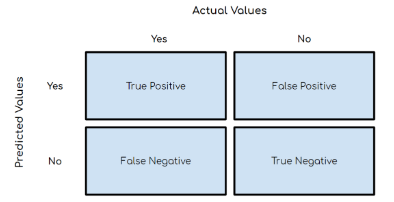

[[356923 128934]
 [  4608   1715]]
[[353257  72582]
 [ 55049  11292]]
[[ 31581  41083]
 [182942 236574]]


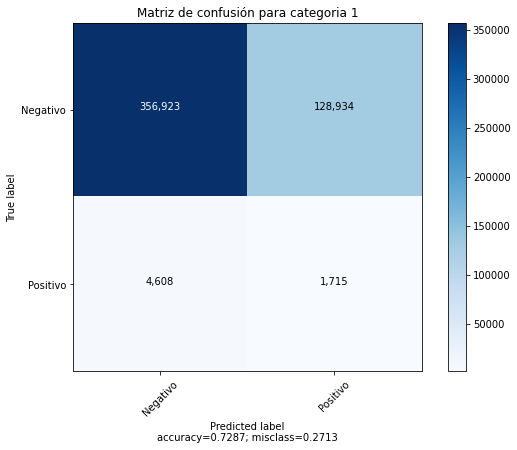

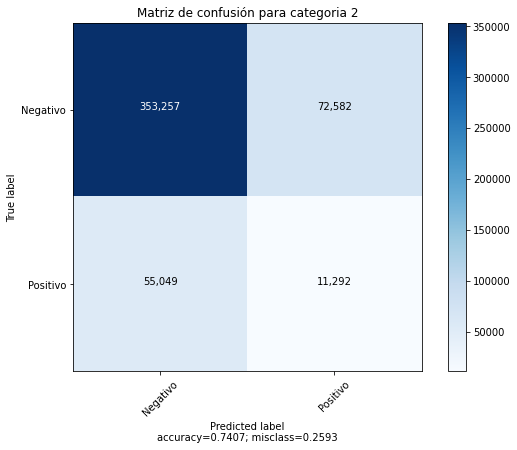

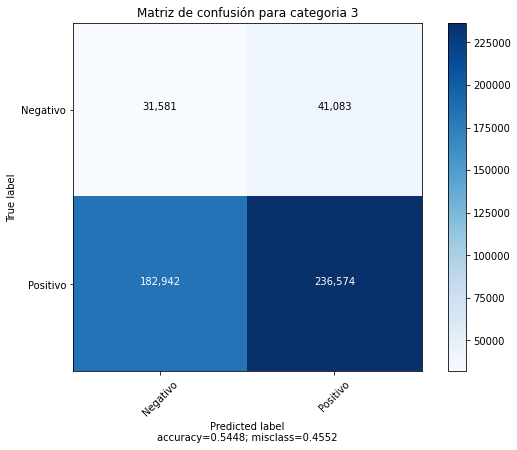

In [ ]:
# Grafico de la matriz de confusión multinivel
matrices = metrics.multilabel_confusion_matrix(y_test,y_pred_test)
for i in range(3):
  print(matrices[i])
  graficarMatrizConf(matrices[i],["Negativo", "Positivo"],f"Matriz de confusión para categoria {i+1}",None,False)

**Curva de aprendizaje**

In [ ]:
def lc_plot(estimator,X,y):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes= [0.3, 0.5,0.7,0.9], 
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=val_size))
    
    train_scores = np.abs(train_scores)
    valid_scores = np.abs(valid_scores)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
    plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")



    plt.grid()
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("RMSLE"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return plt

In [ ]:
Rdm_forest = RandomForestRegressor(n_estimators = 15,max_depth = 9)

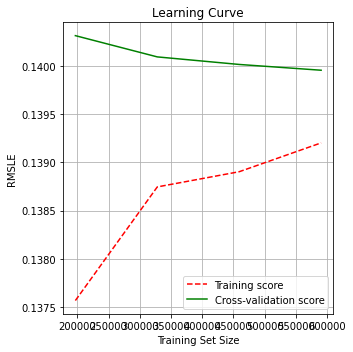

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
lc_plot(Rdm_forest,X_train,y_train)

### 3.7 Evaluación de las variables con FeatureImportances()


para mejorar el error se usa feature importances para evaluar que variables tienen mas peso para la prediccion del modelo en funcion de la variable de salida


In [ ]:
X.columns

Index(['Road_Type', 'Speed_limit', 'Junction_Detail', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Vehicle_Reference_x',
       'Casualty_Severity', 'Vehicle_Reference_y', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle'],
      dtype='object')

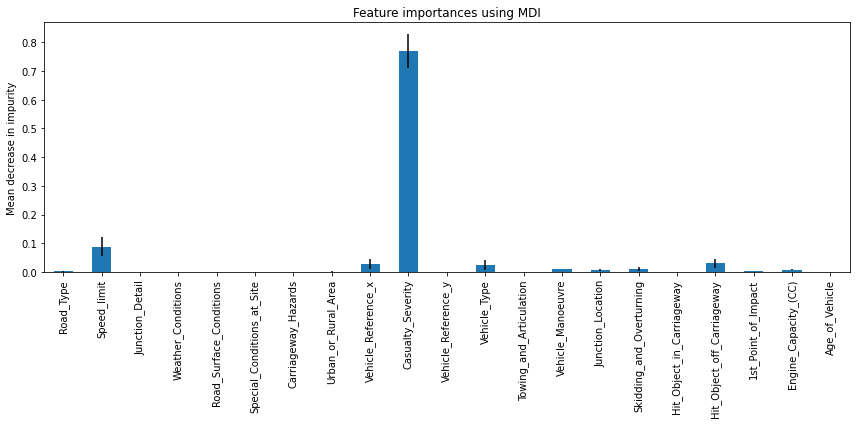

In [ ]:
importances = model_selected.feature_importances_
feature_names = X.columns
std = np.std([tree.feature_importances_ for tree in model_selected.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(12,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 3.8 Visualización de ypred vs ytest

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


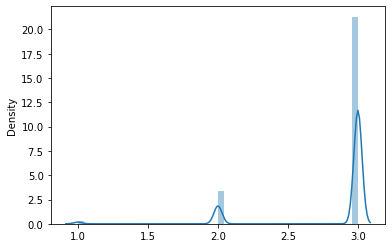

In [ ]:
sns.distplot(y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


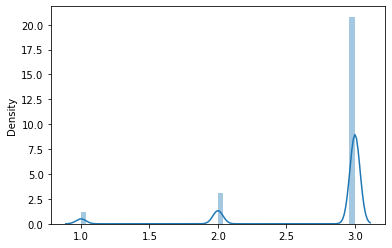

In [ ]:
sns.distplot(y_pred_test)